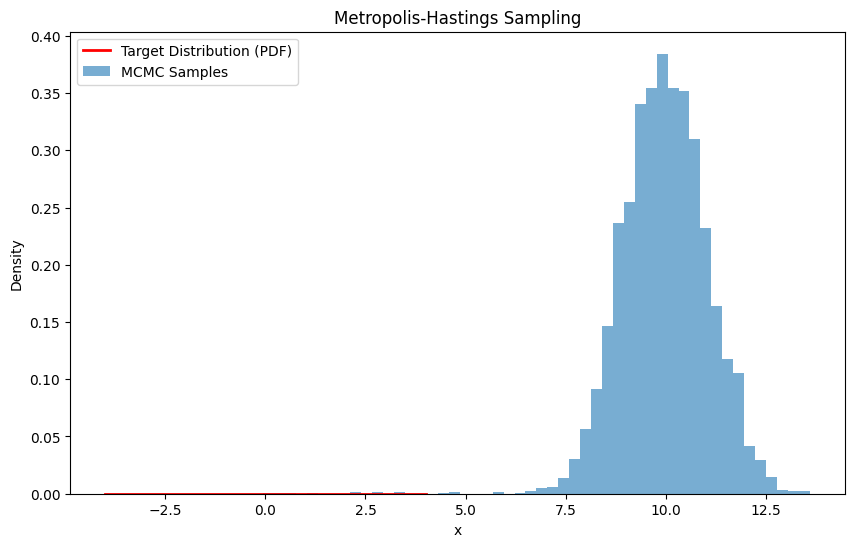

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: Standard normal PDF
def target_distribution(x):
    return np.exp(-0.5 * (x-10)**2) / np.sqrt(2 * np.pi)

# Metropolis-Hastings algorithm
def metropolis_hastings(target_fn, proposal_std, num_samples, initial_x):
    samples = []
    current_x = initial_x
    for _ in range(num_samples):
        # Step 1: Propose a new sample
        proposed_x = np.random.normal(current_x, proposal_std)

        # Step 2: Compute acceptance ratio
        acceptance_ratio = target_fn(proposed_x) / target_fn(current_x)

        # Step 3: Accept or reject the proposal
        if np.random.rand() < acceptance_ratio:
            current_x = proposed_x  # Accept the proposal

        samples.append(current_x)  # Store the current sample

    return np.array(samples)

# Parameters
proposal_std = 1.0
num_samples = 10000
initial_x = 0.0

# Run the MCMC sampler
samples = metropolis_hastings(target_distribution, proposal_std, num_samples, initial_x)

# Plot the results
x = np.linspace(-4, 4, 1000)
y = target_distribution(x)

plt.figure(figsize=(10, 6))

# Plot the target distribution
plt.plot(x, y, label='Target Distribution (PDF)', color='red', linewidth=2)

# Plot the histogram of samples
plt.hist(samples, bins=50, density=True, alpha=0.6, label='MCMC Samples')

plt.title("Metropolis-Hastings Sampling")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


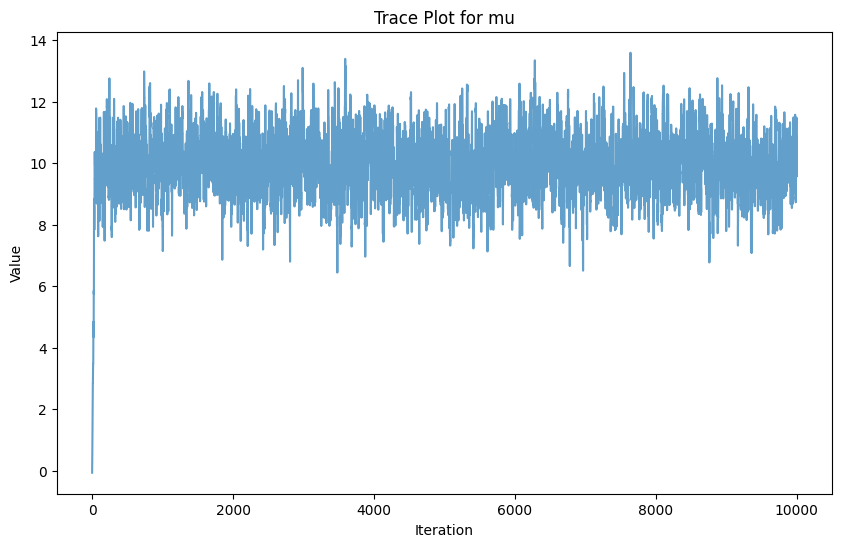

In [5]:
import matplotlib.pyplot as plt

# Assuming `samples` is a NumPy array of MCMC samples for a parameter
def plot_trace(samples, param_name="Parameter"):
    plt.figure(figsize=(10, 6))
    plt.plot(samples, alpha=0.7)
    plt.title(f"Trace Plot for {param_name}")
    plt.xlabel("Iteration")
    plt.ylabel("Value")
    plt.show()

# Example usage
plot_trace(samples, param_name="mu")